In [1]:
import matplotlib.pyplot as plt

from configs import config

from connectome import get_image_paths, select_random_images

from connectome import DataProcessor

/home/eudald/Desktop/doctorat/connectome/venv/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
training_images = get_image_paths("images/two_colors/train/blue", 10)
data_processor = DataProcessor(config)

In [3]:
batch_files, already_selected = select_random_images(training_images, 10, [])
images, labels = data_processor.get_data_from_paths(batch_files)


ValueError: Unexpected directory label blue

In [7]:
import numpy as np

voronoi_color = "#ff9933"
voronoi_width = 1

def plot_voronoi_cells_with_neurons(self, neuron_data, ax):
    # Set black background
    ax.set_facecolor("black")

    # Modern color palette that pops on black:
    self.color_map = {
        "R1-6": "#ffffff",  # Bright mint
        "R7": "#1e90ff",  # Bright rose
        "R8p": "#50ff50",  # Bright gold
        "R8y": "#ff4d4d",  # Bright cyan
    }

    plot_data = neuron_data.copy()

    jitter_size = 4

    non_r1_6_mask = plot_data["cell_type"] != "R1-6"

    # Generate random choices between x and y jitter for each point
    x_choice = np.random.choice([-jitter_size, jitter_size], size=len(plot_data))

    # Where xy_choice is 0, make yx_choice ±2
    y_choice = np.random.choice([-jitter_size, jitter_size], size=len(plot_data))

    # Apply jitter only to non-R1-6 neurons
    plot_data.loc[non_r1_6_mask, "x_axis"] += x_choice[non_r1_6_mask]
    plot_data.loc[non_r1_6_mask, "y_axis"] += y_choice[non_r1_6_mask]

    plot_data["color"] = plot_data["cell_type"].apply(lambda x: self.color_map[x])

    self._plot_voronoi_cells(ax, line_color=voronoi_color, line_width=voronoi_width)

    plot_data["y_axis"] = self.pixel_num - 1 - plot_data["y_axis"]

    # Plot neurons with improved visibility
    for cell_type, color in self.color_map.items():
        points = plot_data[plot_data["cell_type"] == cell_type]
        ax.scatter(
            points["x_axis"],
            points["y_axis"],
            color=color,
            s= 1 if cell_type == "R1-6" else 5,  
            alpha=0.8 if cell_type == "R1-6" else 1, 
            label=cell_type,
        )

    # Legend with white text
    legend = ax.legend(title="Cell Types", loc="lower right", frameon=True)
    legend.get_frame().set_facecolor("black")
    legend.get_frame().set_edgecolor("white")
    plt.setp(legend.get_texts(), color="white")
    plt.setp(legend.get_title(), color="white")

    self.clip_image(ax)

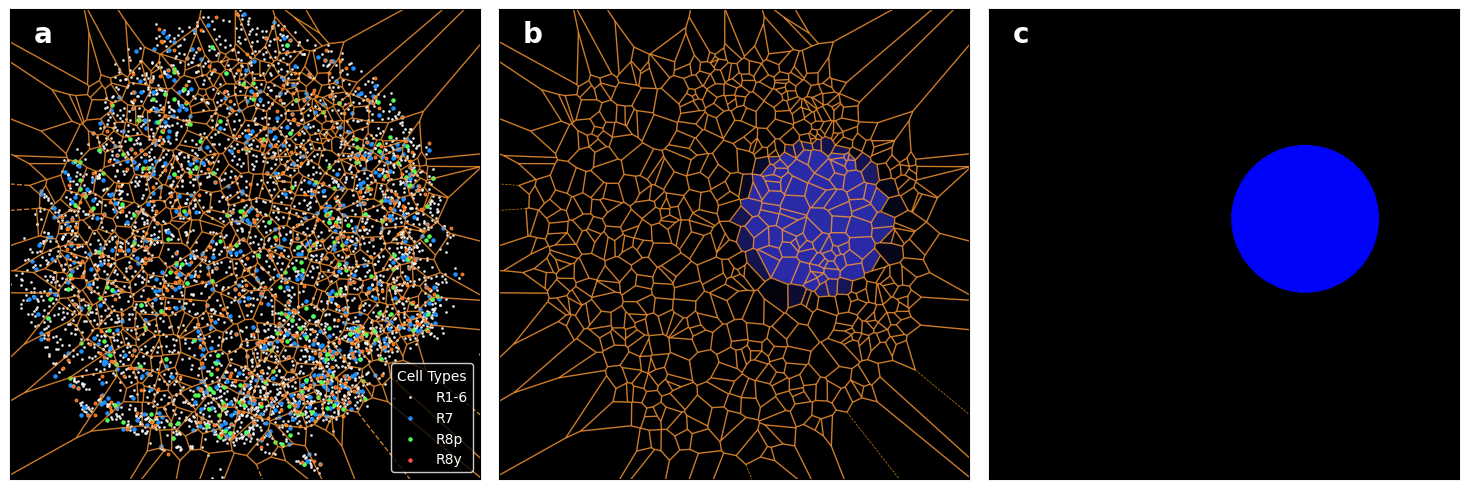

In [6]:
%matplotlib inline
img = images[2]
plt.close("all")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_voronoi_cells_with_neurons(
    data_processor.voronoi_cells, data_processor.tesselated_neurons, axes[0]
)
data_processor.plot_neuron_activations(img, axes[1], voronoi_color, voronoi_width)
data_processor.voronoi_cells.plot_input_image(img, axes[2])

# Add panel labels
for ax, label in zip(axes, ["a", "b", "c"]):
    ax.text(
        0.05,
        0.93,
        label,
        transform=ax.transAxes,
        fontsize=20,
        fontweight="bold",
        color="white",
    )

plt.tight_layout()
plt.show()
# plt.savefig("plots/input_tesselation.pdf", dpi=300, bbox_inches="tight")

In [4]:
training_images = get_image_paths("images/two_shapes3/train/star", 10)
data_processor1 = DataProcessor(config)
batch_files, already_selected = select_random_images(training_images, 10, [])
images1, labels = data_processor1.get_data_from_paths(batch_files)
training_images = get_image_paths("images/two_colors/train/blue", 10)
data_processor2 = DataProcessor(config)
data_processor2.classes = ["blue", "yellow"]
batch_files, already_selected = select_random_images(training_images, 10, [])
images2, labels = data_processor2.get_data_from_paths(batch_files)

In [5]:
img1 = images1[0]
img2 = images2[1]

In [30]:
%matplotlib inline
plt.close("all")
fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('#d3d3d3')
gs = fig.add_gridspec(2, 4, height_ratios=[1, 1], width_ratios=[1, 1, 1, 1], 
                     hspace=-0.38, wspace=0.05,)
                     #left=0.05, right=0.95, top=0.95, bottom=0.05)

ax1 = fig.add_subplot(gs[0:2, 0:2])
ax2 = fig.add_subplot(gs[0, 2])    
ax3 = fig.add_subplot(gs[0, 3])
ax4 = fig.add_subplot(gs[1, 2])    
ax5 = fig.add_subplot(gs[1, 3]) 

axes = [ax1, ax2, ax3, ax4, ax5]

# First row - original image
plot_voronoi_cells_with_neurons(
    data_processor1.voronoi_cells, data_processor1.tesselated_neurons, ax1
)
data_processor1.plot_neuron_activations(img1, ax2, voronoi_color, voronoi_width)
data_processor1.voronoi_cells.plot_input_image(img1, ax3)

# Second row - new image
data_processor2.plot_neuron_activations(img2, ax4, voronoi_color, voronoi_width)
data_processor2.voronoi_cells.plot_input_image(img2, ax5)

# Add panel labels to all subplots
labels = ["a", "b", "c", "d", "e"]
for ax, label in zip(axes, ["a", "b", "c", "d", "e"]):
    ax.text(
        0.05,
        0.95 if label == "a" else 0.9,
        label,
        transform=ax.transAxes,
        fontsize=20,
        fontweight="bold",
        color="white",
    )

# plt.tight_layout()
# plt.show()
plt.savefig("plots/input_tesselation.pdf", dpi=300, bbox_inches="tight")